In [2]:
#!pip install pandas_gbq
import pandas as pd

project_id = 'test-pj-sunkyung'
query = 'select title, accepted_answer_id, answer_count, comment_count, favorite_count, score, tags, view_count \
         from `bigquery-public-data.stackoverflow.posts_questions` \
         where answer_count > 0 \
         order by view_count desc \
         limit 100'

question_df = pd.read_gbq(project_id=project_id, query=query, dialect='standard')
print(question_df.head)

<bound method NDFrame.head of                                                 title  accepted_answer_id  \
0   How do I undo the most recent local commits in...            927386.0   
1   How do I delete a Git branch locally and remot...           2003515.0   
2   How do I remove a particular element from an a...           5767357.0   
3   How do I find all files containing specific te...          16957078.0   
4               How do I redirect to another webpage?            506004.0   
..                                                ...                 ...   
95              How to resolve merge conflicts in Git            163659.0   
96  How to change an element's class with JavaScript?            196038.0   
97  What does "Could not find or load main class" ...          18093929.0   
98  How to align a <div> to the middle (horizontal...            953934.0   
99       How do I get the current date in JavaScript?           4929629.0   

    answer_count  comment_count  favorite_cou

In [3]:
import numpy as np
import nltk
import re
import os
import codecs
from sklearn import feature_extraction

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# nltk.download('stopwords')
# nltk.download('punkt')

stopwords = nltk.corpus.stopwords.words('english')
# print (stopwords[:10])

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

question_df['tokenized_sents'] = question_df.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)
print (question_df.head)

<bound method NDFrame.head of                                                 title  accepted_answer_id  \
0   How do I undo the most recent local commits in...            927386.0   
1   How do I delete a Git branch locally and remot...           2003515.0   
2   How do I remove a particular element from an a...           5767357.0   
3   How do I find all files containing specific te...          16957078.0   
4               How do I redirect to another webpage?            506004.0   
..                                                ...                 ...   
95              How to resolve merge conflicts in Git            163659.0   
96  How to change an element's class with JavaScript?            196038.0   
97  What does "Could not find or load main class" ...          18093929.0   
98  How to align a <div> to the middle (horizontal...            953934.0   
99       How do I get the current date in JavaScript?           4929629.0   

    answer_count  comment_count  favorite_cou

In [4]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems



from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer = TfidfVectorizer(max_features=200000, stop_words='english', tokenizer=tokenize_and_stem)
#tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
#                                 min_df=0.2, stop_words='english',
#                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))
tfidf_matrix = tfidf_vectorizer.fit_transform(question_df['title'])

#print(tfidf_vectorizer.get_feature_names())
print(tfidf_matrix.shape)

terms = tfidf_vectorizer.get_feature_names()
print(terms)

(100, 230)
["'s", '__main__', '__name__', 'access-control-allow-origin', 'act', 'add', 'address', 'align', 'alreadi', 'anoth', 'append', 'array', 'arraylist', 'bash', 'befor', 'best', 'branch', 'button', 'c++', 'ca', 'case', 'center', 'chang', 'check', 'checkbox', 'class', 'clone', 'code', 'column', 'command', 'comment', 'commit', 'compar', 'concaten', 'conflict', 'contain', 'content', 'convert', 'correct', 'creat', 'css', 'curl', 'current', 'data', 'datatyp', 'date', 'datetim', 'decim', 'declar', 'default', 'delay', 'delet', 'determin', 'dictionari', 'differ', 'directori', 'display', 'div', 'doe', 'dropdown', 'duplic', 'easiest', 'element', 'els', 'email', 'empty/undefined/nul', 'encount', 'end', 'error', 'exist', 'express', 'extend', 'extern', 'fetch', 'file', 'fix', 'float', 'folder', 'for-each', 'forc', 'format', 'function', 'generat', 'git', 'given', 'global', 'hard', 'hashmap', 'head', 'header', 'hidden', 'horizont', 'horizontally/width', 'html', 'import', 'includ', 'index', 'ini

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [5]:
from sklearn.metrics.pairwise import cosine_similarity
dist= 1 - cosine_similarity(tfidf_matrix)

In [6]:
from sklearn.cluster import KMeans

num_clusters = 10

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 112 ms, sys: 4.24 ms, total: 117 ms
Wall time: 127 ms


In [7]:
import pickle
import joblib

s = pickle.dumps(km)
km2 = pickle.loads(s)

clusters = km2.labels_.tolist()

In [8]:
title_list = question_df['title'].values.tolist()
tag_list = question_df['tags'].values.tolist()
view_cnt_list = question_df['view_count'].values.tolist()
answer_cnt_list = question_df['answer_count'].values.tolist()
comment_cnt_list = question_df['comment_count'].values.tolist()
favorite_cnt_list = question_df['favorite_count'].values.tolist()
score_list = question_df['score'].values.tolist()

#select title, accepted_answer_id, answer_count, comment_count, favorite_count, score, tags, view_count
questions = {'cluster': clusters, 'title': title_list, 'tag': tag_list, 'view_count': view_cnt_list, 'answer_count': answer_cnt_list, 'comment_count': comment_cnt_list, 'favorite_count': favorite_cnt_list, 'score': score_list}

frame = pd.DataFrame(questions, index = [clusters] , columns = ['cluster', 'title', 'tag', 'view_count', 'answer_count', 'comment_count', 'favorite_count', 'score'])
print (frame.head)

# number of quesions per cluster
frame['cluster'].value_counts()

<bound method NDFrame.head of     cluster                                              title  \
6         6  How do I undo the most recent local commits in...   
5         5  How do I delete a Git branch locally and remot...   
4         4  How do I remove a particular element from an a...   
2         2  How do I find all files containing specific te...   
0         0              How do I redirect to another webpage?   
..      ...                                                ...   
5         5              How to resolve merge conflicts in Git   
4         4  How to change an element's class with JavaScript?   
0         0  What does "Could not find or load main class" ...   
0         0  How to align a <div> to the middle (horizontal...   
4         4       How do I get the current date in JavaScript?   

                                                  tag  view_count  \
6                    gitversion-controlgit-commitundo     8083391   
5                             gitgit-br

0    27
8    15
4    13
5     9
3     8
7     6
6     6
2     6
1     6
9     4
Name: cluster, dtype: int64

In [9]:
grouped_view_cnt = frame['view_count'].groupby(frame['cluster'])
grouped_view_cnt.sum()

cluster
0    83198629
1    18568849
2    26232340
3    28732407
4    40883378
5    32142341
6    23722377
7    18429948
8    46637908
9    11900795
Name: view_count, dtype: int64

In [10]:
grouped_answer_cnt = frame['answer_count'].groupby(frame['cluster'])
grouped_answer_cnt.sum()

cluster
0    1240
1     192
2     148
3     230
4     596
5     255
6     200
7     270
8     418
9     130
Name: answer_count, dtype: int64

In [11]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km2.cluster_centers_.argsort()[:, ::-1] 
print(order_centroids)

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]:
        #print("ind=%d" % ind)
        #print("terms[ind]= %s" % terms[ind])
        print(' %s' % terms[ind], end='')
        
    print()
    print()
    
    print("Cluster %d titles:" % i, end='')
    for title in frame.loc[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()


Top terms per cluster:

[[ 53 104 108 ...  96  97 114]
 [198  37 102 ... 142 141   0]
 [ 35 198 200 ... 144 143   0]
 ...
 [ 23 107  69 ... 144 143   0]
 [196 184 186 ... 137 136   0]
 [149  68 215 ... 142 141   0]]
Cluster 0 words: dictionari iter json redirect instal center

Cluster 0 titles: How do I redirect to another webpage?, How to create an HTML button that acts like a link?, Iterating over dictionaries using 'for' loops, How to horizontally center a <div>?, Iterate through a HashMap, Redirect from an HTML page, How do I get the number of elements in a list?, Add new keys to a dictionary?, How do I vertically center text with CSS?, Check if a given key already exists in a dictionary, Tab space instead of multiple non-breaking spaces ("nbsp")?, What is the best comment in source code you have ever encountered?, How do I install pip on Windows?, How to append something to an array?, How can I make a time delay in Python?, Determine installed PowerShell version, What is the diffe

In [47]:
sse = []
# list_k = list(range(1, 10))
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(tfidf_matrix)
    sse.append(km.inertia_)

print(len(sse))

14


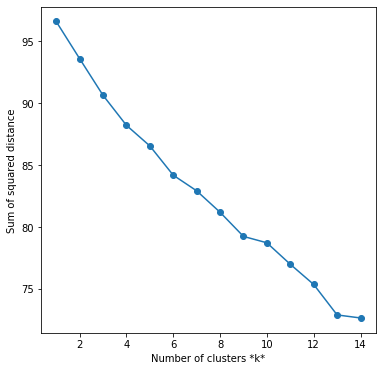

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS
MDS()

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [30]:
cluster_colors = {0: '#FF0000', 1: '#800000', 2: '#FFFF00', 3: '#808000', 4: '#00FF00', 5: '#008000', 6: '#00FFFF', 7: '#008080', 8: '#0000FF', 9: '#FF00FF'}

cluster_names = {0: 'php redirect instal center window page', 
                 1: 'git local branch repositori commit remot', 
                 2: 'javascript array loop timestamp java for-each', 
                 3: 'current python time javascript extern date', 
                 4: 'sql server valu select queri tabl',
                 5: 'check jqueri checkbox element hidden set',
                 6: 'string convert int integ java datetim',
                 7: 'java creat string split compar write',
                 8: 'contain doe substr python string word',
                 9: 'file directori list exist check linux'}


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


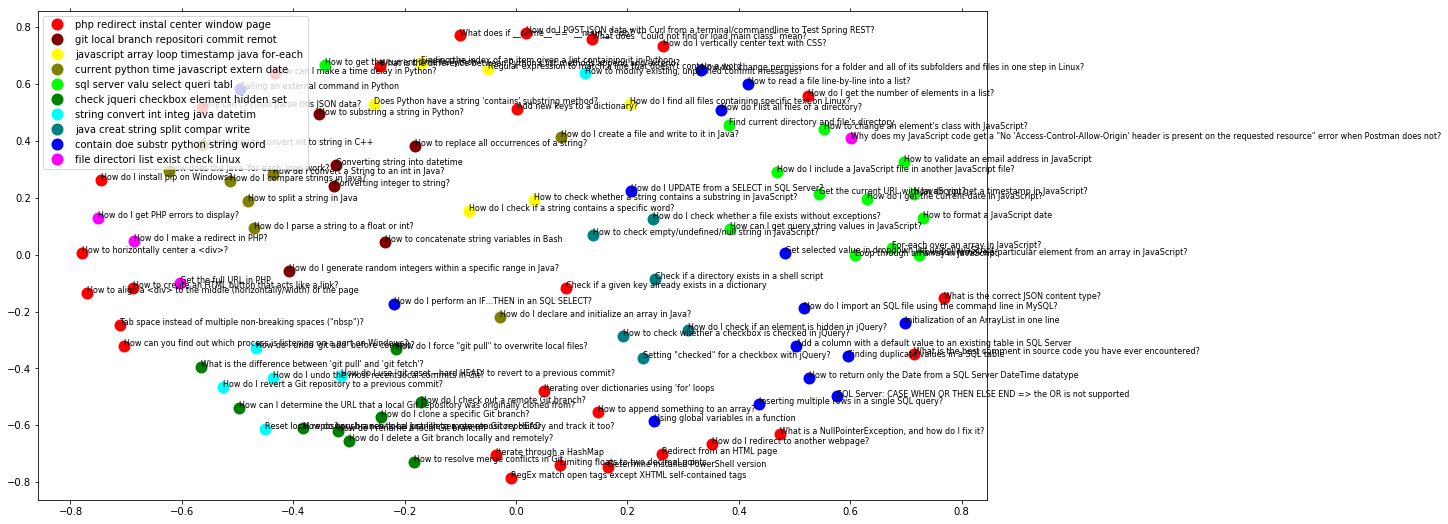

<Figure size 432x288 with 0 Axes>

In [49]:
%matplotlib inline

df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=title_list)) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05)

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)

for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)
    
plt.show()

plt.savefig('question_clusters.png', dpi=200)

In [34]:
plt.close()

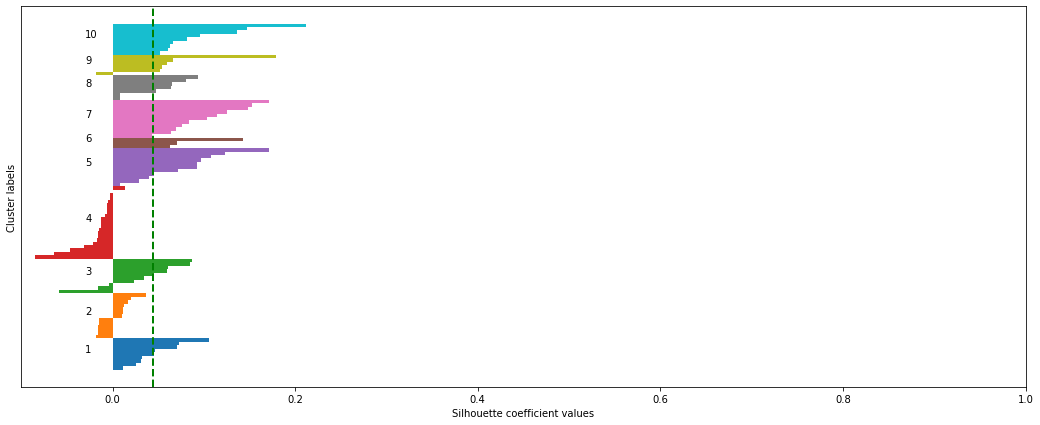

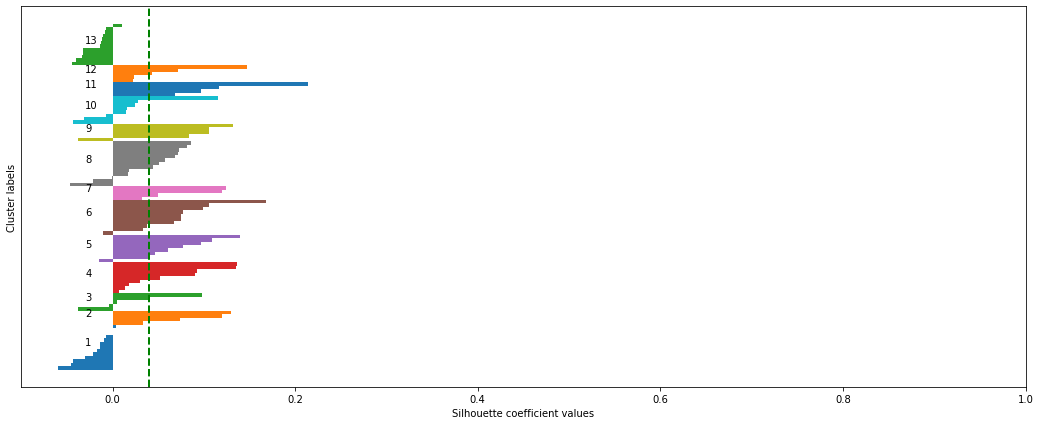

In [58]:
from sklearn.metrics import silhouette_samples, silhouette_score

for i, k in enumerate([10, 13]):
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(tfidf_matrix)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(tfidf_matrix, labels)

    # Silhouette plot
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')